In [1]:
import torch

import numpy as np

import matplotlib.pyplot as plt

In [2]:
checkpoint = torch.load("models/mobilenet_v3_large_best_f1.pth")

C:\Users\PC\AppData\Local\Temp\ipykernel_4100\2250077822.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("models/mobilenet_v3_large_best_f1.pth")

<Figure size 1000x700 with 0 Axes>

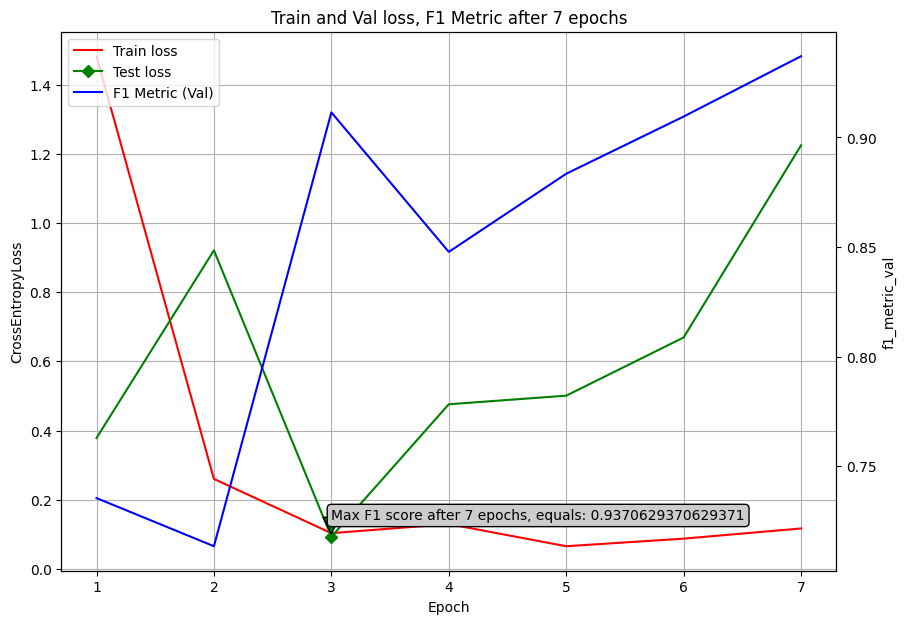

In [3]:
losses_val = checkpoint["val_loss"]
losses_train = checkpoint["train_loss"]
f1_metric_val = checkpoint["f1_metric_val"]
name_of_the_net = "efficientnet_b0"

plt.figure(figsize=(10, 7))
marker_on = [losses_val.index(min(losses_val))]

# Create the first plot with the left y-axis
fig, ax1 = plt.subplots(figsize=(10, 7))

# Plot train and validation loss on the left y-axis
ax1.plot(
    np.arange(1, len(losses_train) + 1), losses_train, color="r", label="Train loss"
)
ax1.plot(
    np.arange(1, len(losses_val) + 1),
    losses_val,
    "-gD",
    label="Test loss",
    markevery=marker_on,
)

# Annotate the minimum loss point
bbox = dict(boxstyle="round", fc="0.8")
ax1.annotate(
    text=f"Max F1 score after {f1_metric_val.index(max(f1_metric_val))+1} epochs, equals: {max(f1_metric_val)}",
    xy=(losses_val.index(min(losses_val)) + 1, min(losses_val)),
    xytext=(losses_val.index(min(losses_val)) + 1, min(losses_val) + 0.05),
    arrowprops=dict(facecolor="green", shrink=0.2),
    bbox=bbox,
)

ax1.set_xlabel("Epoch")
ax1.set_ylabel("CrossEntropyLoss")
ax1.grid()

# Create the second y-axis for F1 metric
ax2 = ax1.twinx()
ax2.plot(
    np.arange(1, len(f1_metric_val) + 1),
    f1_metric_val,
    color="blue",
    label="F1 Metric (Val)",
)
ax2.set_ylabel("f1_metric_val")

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.title(f"Train and Val loss, F1 Metric after {len(losses_train)} epochs")
plt.savefig(f"plots/{name_of_the_net}.png")
plt.show()